In [ ]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
from timm.data.constants import \
    IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from main_utils import *

import numpy as np

Using Device: cuda


In [3]:
DATASET_DIR = 'dataset-ISIC'
BATCH_SIZE = 32
NUM_CLASSES = 9


METADATA_FILE_PTH = os.path.join(DATASET_DIR, 'ISIC_2019_Training_GroundTruth.csv')
IMAGES_DIR = os.path.join(DATASET_DIR, 'ISIC_2019_Training_Input')


TRAIN_DIR_PTH = os.path.join(DATASET_DIR, 'train_data.csv')
VAL_DIR_PTH = os.path.join(DATASET_DIR, 'val_data.csv')
TEST_DIR_PTH = os.path.join(DATASET_DIR, 'test_data.csv')


In [17]:
label_mapping_isic2018 = {
    'MEL': 0,
    'NV': 1,
    'BCC': 2,
    'AKIEC': 3,
    'BKL': 4,
    'DF': 5,
    'VASC': 6
}
list(label_mapping_isic2018.keys())

['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

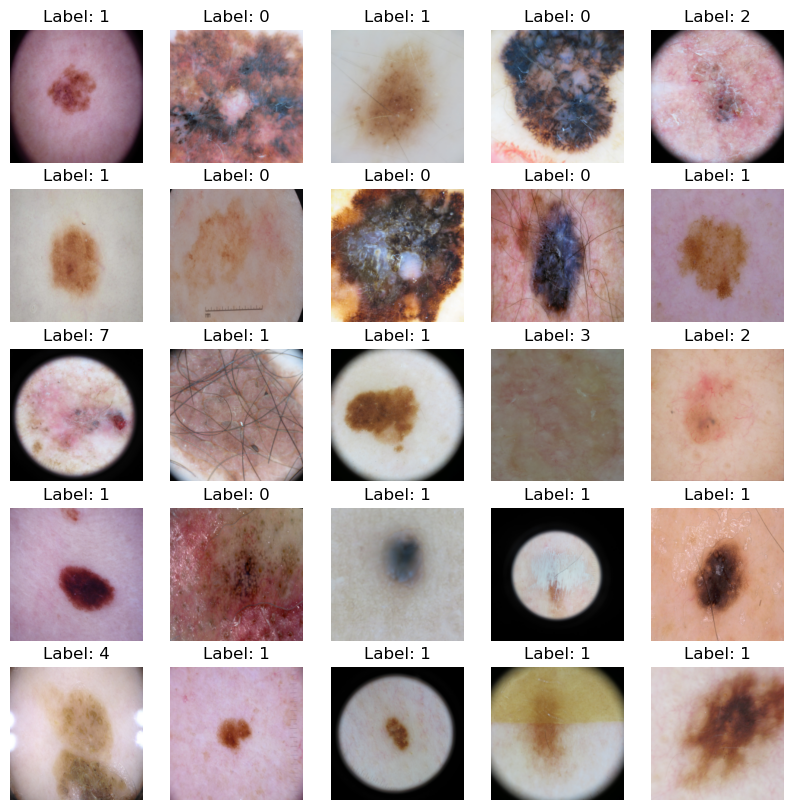

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.4722441].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7411594..2.5528543].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1072767..1.8382572].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6897851..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2641394..1.6988237].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906..1.106

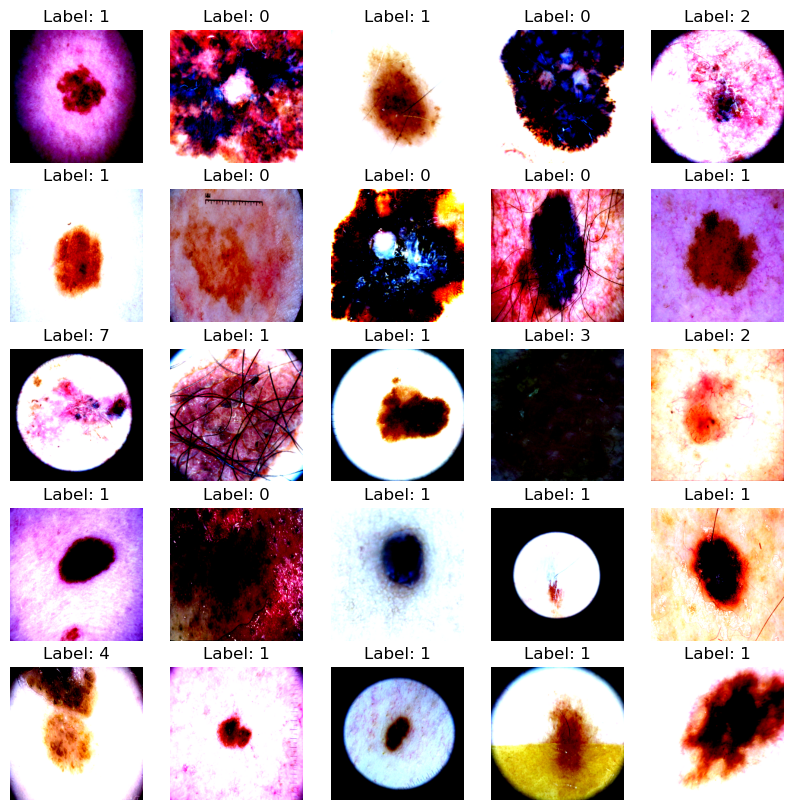

In [ ]:

# Define data preprocessing transformations
transforms_normal = transforms.Compose([
    transforms.Resize((224, 224)),#,interpolation=transforms.InterpolationMode.BICUBIC),
    # transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    # transforms.RandomRotation(20),
    # transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    # transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    # transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD)
])

train_transforms = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BICUBIC),
    # transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    # transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD)
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD)
])

# Create datasets and dataloaders
train_dataset_normal = ISIC2019Dataset(csv_file=TRAIN_DIR_PTH, 
                                img_dir=IMAGES_DIR, 
                                transform=transforms_normal)

train_dataset = ISIC2019Dataset(csv_file=TRAIN_DIR_PTH, 
                                img_dir=IMAGES_DIR, 
                                transform=train_transforms)
# val_dataset = ISIC2019Dataset(csv_file=VAL_DIR_PTH, 
#                               img_dir=IMAGES_DIR, 
#                               transform=test_transforms)
# test_dataset = ISIC2019Dataset(csv_file=TEST_DIR_PTH, 
#                                img_dir=IMAGES_DIR, 
#                                transform=test_transforms)

train_loader_normal = DataLoader(train_dataset_normal, batch_size=BATCH_SIZE, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)

# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)
# test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)


plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(train_loader_normal):
    # For channels-first 
    image = image.numpy().transpose((0, 2, 3, 1))  

    for j in range(25):  
        plt.subplot(5, 5, j + 1)  
        plt.imshow(image[j])  
        plt.title(f"Label: {label[j]}") 
        plt.axis('off')
    break

plt.show()  # Show the plot

plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(train_loader):
    # For channels-first 
    image = image.numpy().transpose((0, 2, 3, 1))  

    for j in range(25):  
        plt.subplot(5, 5, j + 1)  
        plt.imshow(image[j])  
        plt.title(f"Label: {label[j]}") 
        plt.axis('off')
    break
plt.show()